In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


In [3]:
def compute_new_position(pos, vel, dt=1.):
    """ dt is the time delta in seconds."""
    return pos + (vel * dt)

def measure_position(pos,noise):
    return pos + np.random.randn()*noise

def gen_train_data(pos, vel, count, noise):
    zs = []
    signal=[]
    for t in range(count):
        pos = compute_new_position(pos, vel)
        zs.append(measure_position(pos,noise))
        signal.append(pos)
    return np.asarray(zs),np.asarray(signal)
def g_h_filter(data, x0, dx, g, h, dt=1.):
    x_est = x0
    results = []
    for z in data:
        # prediction step
        x_pred = x_est + (dx*dt)
        dx = dx

        # update step
        residual = z - x_pred
        dx = dx + h * (residual) / dt
        x_est = x_pred + g * residual
        results.append(x_est)
    return np.array(results)


pos=50000 # Metros
vel=25 # m/s

# Generación de datos

In [5]:
z_noise,z_ideal = gen_train_data(pos=pos, vel=vel, 
                                 count=100,noise=350)

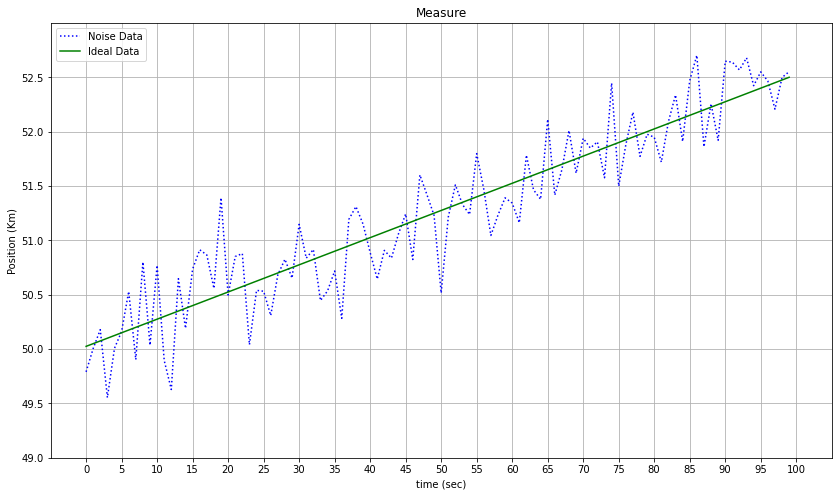

In [6]:
val_min,val_max=min(z_noise)/1000,max(z_noise)/1000
plt.figure(figsize=(14,8))
plt.plot(z_noise/1000,color='blue',linestyle='dotted')
plt.plot(z_ideal/1000,color='green')
plt.xlabel("time (sec)")
plt.ylabel("Position (Km)")
plt.legend(["Noise Data", "Ideal Data"])
plt.axis([-5,105,np.floor(val_min),np.ceil(val_max)])
plt.yticks(np.arange(np.floor(val_min),np.ceil(val_max),0.5))
plt.xticks(np.arange(0,105,5))
plt.grid()
plt.title("Measure")
plt.savefig("Graph1.png",dpi=300,bbox_inches='tight')
plt.show()

# Sintonización de Filtro

## Experimento 1

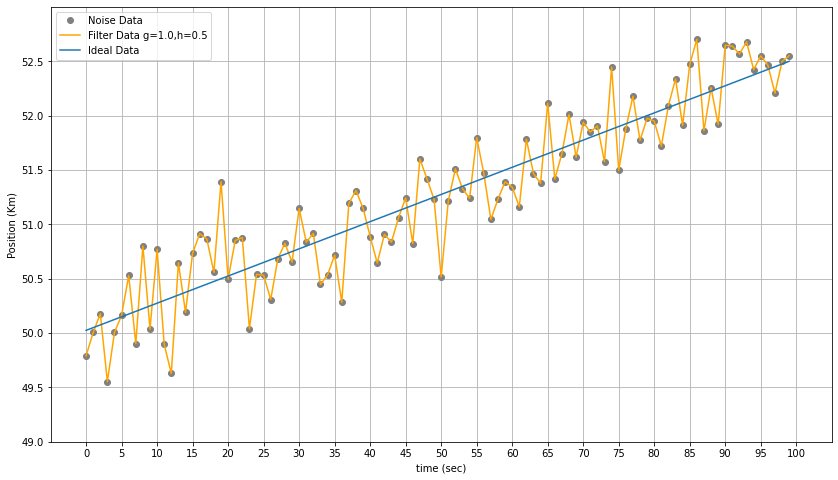

In [9]:
g=1.0
h=0.5

data = g_h_filter(data=z_noise, x0=0, dx=vel, dt=1., g=g, h=g)


plt.figure(figsize=(14,8))
plt.plot(z_noise/1000,'o',color='gray')
plt.plot(data/1000,color='orange')
plt.plot(z_ideal/1000)
plt.xlabel("time (sec)")
plt.ylabel("Position (Km)")
plt.axis([-5,105,np.floor(val_min),np.ceil(val_max)])
plt.yticks(np.arange(np.floor(val_min),np.ceil(val_max),0.5))
plt.xticks(np.arange(0,105,5))
plt.grid()
tit1="Filter Data g={},h={}".format(g,h)
plt.legend(["Noise Data",tit1,"Ideal Data"])
plt.savefig("Graph1_1.png",dpi=300,bbox_inches='tight')
plt.show()

## Experimento 2

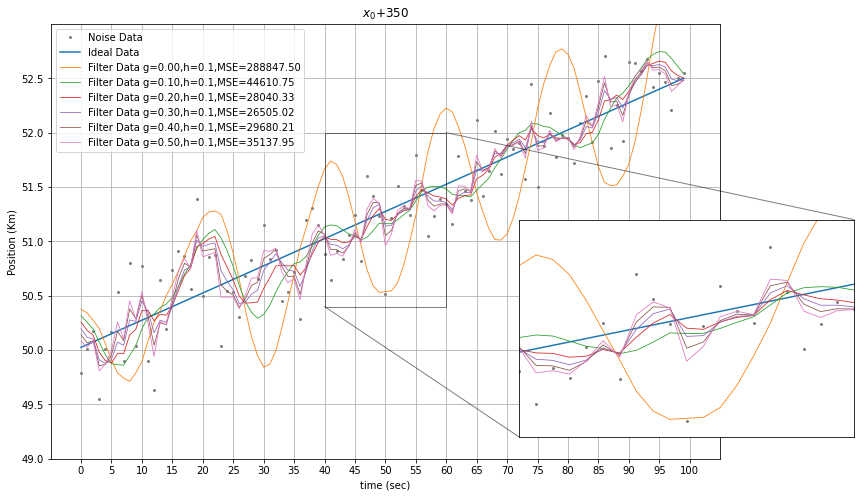

In [24]:
h=0.1
fig,ax=plt.subplots(figsize=(12,8))
ax.plot(z_noise/1000,'o',color='gray',markersize=2)
ax.plot(z_ideal/1000)
legends=[]
legends.append("Noise Data")
legends.append("Ideal Data")
for i in np.arange(0.,0.6,0.1):
    data = g_h_filter(data=z_noise, x0=pos+350, dx=vel, dt=1., g=i, h=h)
    ax.plot(data/1000,lw=0.8)
    mse = mean_squared_error(z_ideal, data)
    legends.append("Filter Data g={:.2f},h={},MSE={:.2f}".format(i,h,mse))


# tit1="Filter Data g={},h={}".format(g,h)
ax.legend(legends)
ax.set_xlabel("time (sec)")
ax.set_ylabel("Position (Km)")
ax.axis([-5,105,np.floor(val_min),np.ceil(val_max)])
ax.set_yticks(np.arange(np.floor(val_min),np.ceil(val_max),0.5))
ax.set_xticks(np.arange(0,105,5))

axins = ax.inset_axes([0.7, 0.05, 0.5, 0.5])
axins.plot(z_noise/1000,'o',color='gray',markersize=2)
axins.plot(z_ideal/1000)
for i in np.arange(0.,0.6,0.1):
    data = g_h_filter(data=z_noise, x0=pos+350, dx=vel, dt=1., g=i, h=h)
    axins.plot(data/1000,lw=0.8)
x1, x2, y1, y2 = 40, 60, 50.4,52
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels([])
axins.set_yticklabels([])
axins.tick_params(axis='both',bottom=False,left=False)

ax.indicate_inset_zoom(axins, edgecolor="black")

ax.grid()
plt.title("$x_0$+350")
plt.savefig("Graph1_2.png",dpi=300,bbox_inches='tight')
plt.show()

## Experimento 3

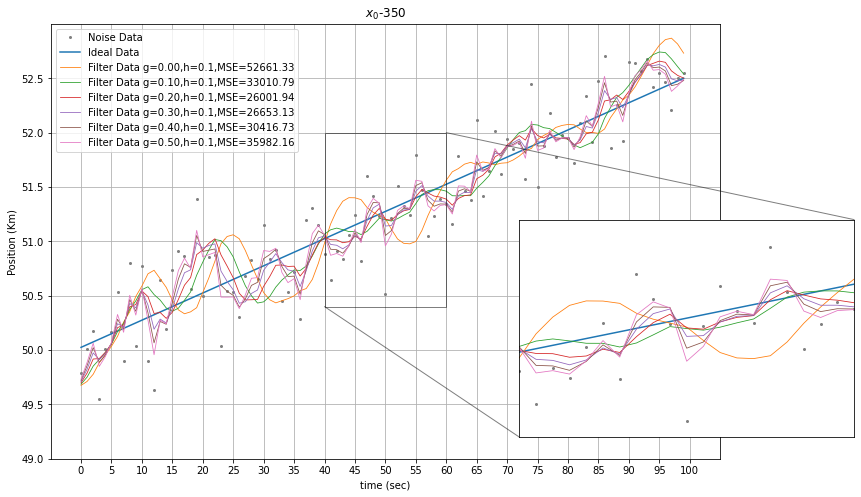

In [26]:
h=0.1
fig,ax=plt.subplots(figsize=(12,8))
ax.plot(z_noise/1000,'o',color='gray',markersize=2)
ax.plot(z_ideal/1000)
legends=[]
legends.append("Noise Data")
legends.append("Ideal Data")
for i in np.arange(0.,0.6,0.1):
    data = g_h_filter(data=z_noise, x0=pos-350, dx=vel, dt=1., g=i, h=h)
    ax.plot(data/1000,lw=0.8)
    mse = mean_squared_error(z_ideal, data)
    legends.append("Filter Data g={:.2f},h={},MSE={:.2f}".format(i,h,mse))


# tit1="Filter Data g={},h={}".format(g,h)
ax.legend(legends)
ax.set_xlabel("time (sec)")
ax.set_ylabel("Position (Km)")
ax.axis([-5,105,np.floor(val_min),np.ceil(val_max)])
ax.set_yticks(np.arange(np.floor(val_min),np.ceil(val_max),0.5))
ax.set_xticks(np.arange(0,105,5))

axins = ax.inset_axes([0.7, 0.05, 0.5, 0.5])
axins.plot(z_noise/1000,'o',color='gray',markersize=2)
axins.plot(z_ideal/1000)
for i in np.arange(0.,0.6,0.1):
    data = g_h_filter(data=z_noise, x0=pos-350, dx=vel, dt=1., g=i, h=h)
    axins.plot(data/1000,lw=0.8)
x1, x2, y1, y2 = 40, 60, 50.4,52
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels([])
axins.set_yticklabels([])
axins.tick_params(axis='both',bottom=False,left=False)

ax.indicate_inset_zoom(axins, edgecolor="black")

ax.grid()
plt.title("$x_0$-350")
plt.savefig("Graph1_3.png",dpi=300,bbox_inches='tight')
plt.show()

## Experimento 4

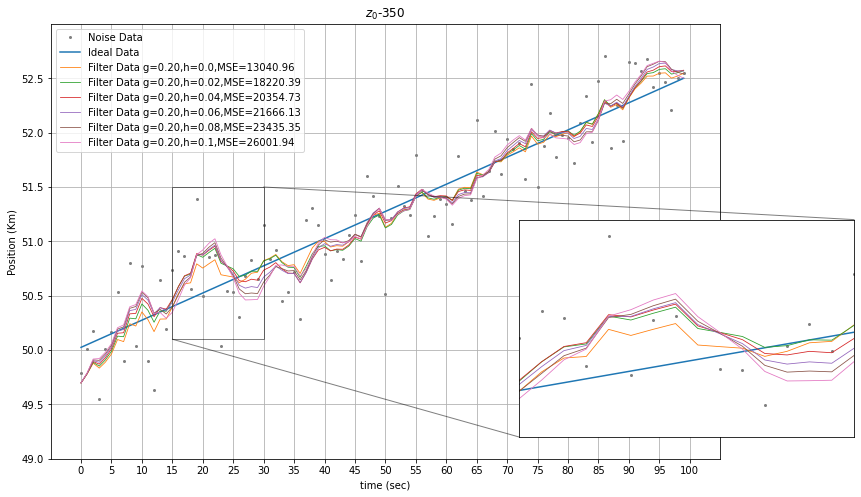

In [30]:
g=0.2
fig,ax=plt.subplots(figsize=(12,8))
ax.plot(z_noise/1000,'o',color='gray',markersize=2)
ax.plot(z_ideal/1000)
legends=[]
legends.append("Noise Data")
legends.append("Ideal Data")
for i in np.arange(0.,0.12,0.02):
    data = g_h_filter(data=z_noise, x0=pos-350, dx=vel, dt=1., g=g, h=i)
    ax.plot(data/1000,lw=0.8)
    mse = mean_squared_error(z_ideal, data)
    legends.append("Filter Data g={:.2f},h={},MSE={:.2f}".format(g,i,mse))


# tit1="Filter Data g={},h={}".format(g,h)
ax.legend(legends)
ax.set_xlabel("time (sec)")
ax.set_ylabel("Position (Km)")
ax.axis([-5,105,np.floor(val_min),np.ceil(val_max)])
ax.set_yticks(np.arange(np.floor(val_min),np.ceil(val_max),0.5))
ax.set_xticks(np.arange(0,105,5))

axins = ax.inset_axes([0.7, 0.05, 0.5, 0.5])
axins.plot(z_noise/1000,'o',color='gray',markersize=2)
axins.plot(z_ideal/1000)
for i in np.arange(0.,0.12,0.02):
    data = g_h_filter(data=z_noise, x0=pos-350, dx=vel, dt=1., g=g, h=i)
    axins.plot(data/1000,lw=0.8)
x1, x2, y1, y2 = 15, 30, 50.1,51.5
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels([])
axins.set_yticklabels([])
axins.tick_params(axis='both',bottom=False,left=False)

ax.indicate_inset_zoom(axins, edgecolor="black")

ax.grid()
plt.title("$z_0$-350")
plt.savefig("Graph1_4.png",dpi=300,bbox_inches='tight')
plt.show()

## Experimento 5

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(z_ori, zs)

print("El error cuadratico medio de la medicion real respecto a la ideal es {} m".format(mse/1000))

h=0.0
g=0.05

for i in np.arange(0.0,0.06,0.01):
    data = g_h_filter(data=zs, x0=pos, dx=vel, dt=1., g=g, h=i)
    mse = mean_squared_error(z_ori/1000, data/1000)
    print("El MSE g={:.2f},h={:.3f} es de {:.3f} m".format(g,i,mse))



## Experimento 6

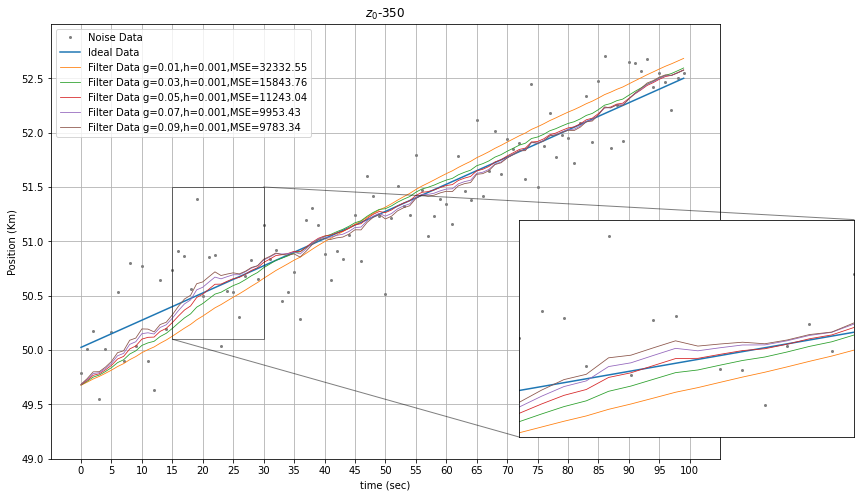

In [38]:
h=0.001
fig,ax=plt.subplots(figsize=(12,8))
ax.plot(z_noise/1000,'o',color='gray',markersize=2)
ax.plot(z_ideal/1000)
legends=[]
legends.append("Noise Data")
legends.append("Ideal Data")
for i in np.arange(0.01,0.10,0.02):
    data = g_h_filter(data=z_noise, x0=pos-350, dx=vel, dt=1., g=i, h=h)
    ax.plot(data/1000,lw=0.8)
    mse = mean_squared_error(z_ideal, data)
    legends.append("Filter Data g={:.2f},h={},MSE={:.2f}".format(i,h,mse))


# tit1="Filter Data g={},h={}".format(g,h)
ax.legend(legends)
ax.set_xlabel("time (sec)")
ax.set_ylabel("Position (Km)")
ax.axis([-5,105,np.floor(val_min),np.ceil(val_max)])
ax.set_yticks(np.arange(np.floor(val_min),np.ceil(val_max),0.5))
ax.set_xticks(np.arange(0,105,5))

axins = ax.inset_axes([0.7, 0.05, 0.5, 0.5])
axins.plot(z_noise/1000,'o',color='gray',markersize=2)
axins.plot(z_ideal/1000)
for i in np.arange(0.01,0.1,0.02):
    data = g_h_filter(data=z_noise, x0=pos-350, dx=vel, dt=1., g=i, h=h)
    axins.plot(data/1000,lw=0.8)
x1, x2, y1, y2 = 15, 30, 50.1,51.5
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels([])
axins.set_yticklabels([])
axins.tick_params(axis='both',bottom=False,left=False)

ax.indicate_inset_zoom(axins, edgecolor="black")

ax.grid()
plt.title("$z_0$-350")
plt.savefig("Graph1_6.png",dpi=300,bbox_inches='tight')
plt.show()

## Experimento 7

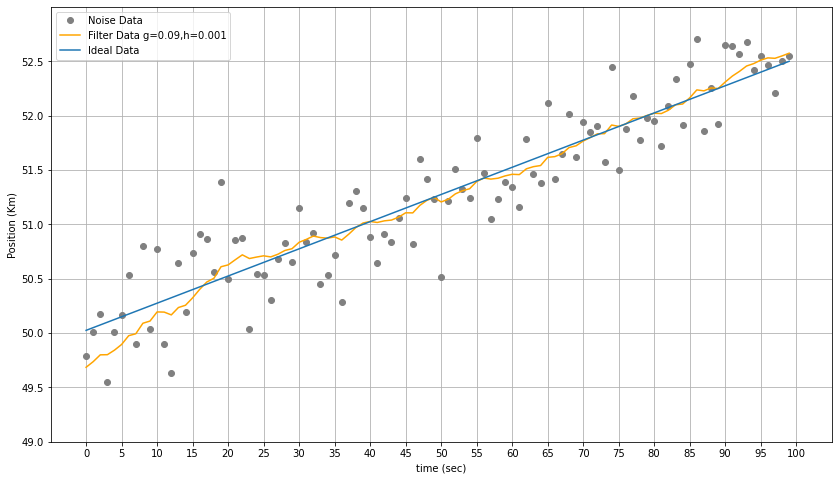

In [52]:
g=0.09
h=0.001

data = g_h_filter(data=z_noise, x0=pos-350, dx=vel, dt=1., g=g, h=h)


plt.figure(figsize=(14,8))
plt.plot(z_noise/1000,'o',color='gray')
plt.plot(data/1000,color='orange')
plt.plot(z_ideal/1000)
plt.xlabel("time (sec)")
plt.ylabel("Position (Km)")
plt.axis([-5,105,np.floor(val_min),np.ceil(val_max)])
plt.yticks(np.arange(np.floor(val_min),np.ceil(val_max),0.5))
plt.xticks(np.arange(0,105,5))
plt.grid()
tit1="Filter Data g={},h={}".format(g,h)
plt.legend(["Noise Data",tit1,"Ideal Data"])
plt.savefig("Graph1_1.png",dpi=300,bbox_inches='tight')
plt.show()

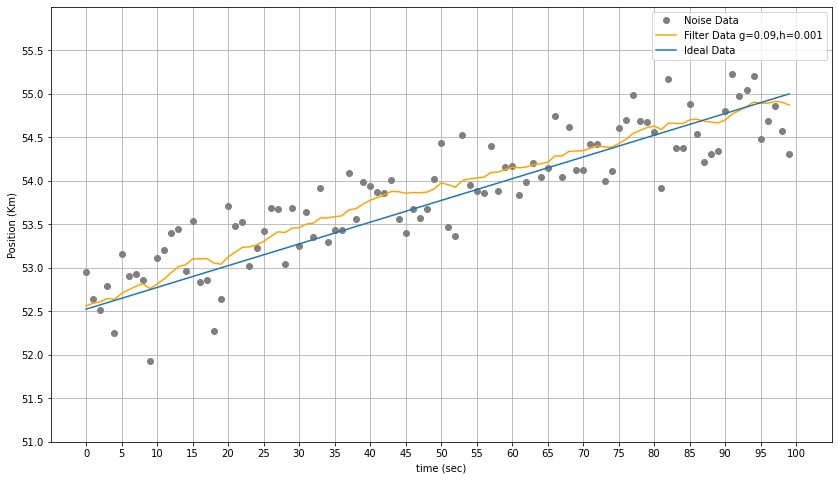

In [70]:
g=0.09
h=0.001
z_noise2,z_ideal2 = gen_train_data(pos=52500, vel=25, 
                                 count=100,noise=350)
data = g_h_filter(data=z_noise2, x0=52500, dx=vel, dt=1., g=g, h=h)
val_min,val_max=min(z_noise2)/1000,max(z_noise2)/1000

plt.figure(figsize=(14,8))
plt.plot(z_noise2/1000,'o',color='gray')
plt.plot(data/1000,color='orange')
plt.plot(z_ideal2/1000)
plt.xlabel("time (sec)")
plt.ylabel("Position (Km)")
plt.axis([-5,105,np.floor(val_min),np.ceil(val_max)])
plt.yticks(np.arange(np.floor(val_min),np.ceil(val_max),0.5))
plt.xticks(np.arange(0,105,5))
plt.grid()
tit1="Filter Data g={},h={}".format(g,h)
plt.legend(["Noise Data",tit1,"Ideal Data"])
plt.savefig("Graph1_1.png",dpi=300,bbox_inches='tight')
plt.show()

# Filtro Ideal

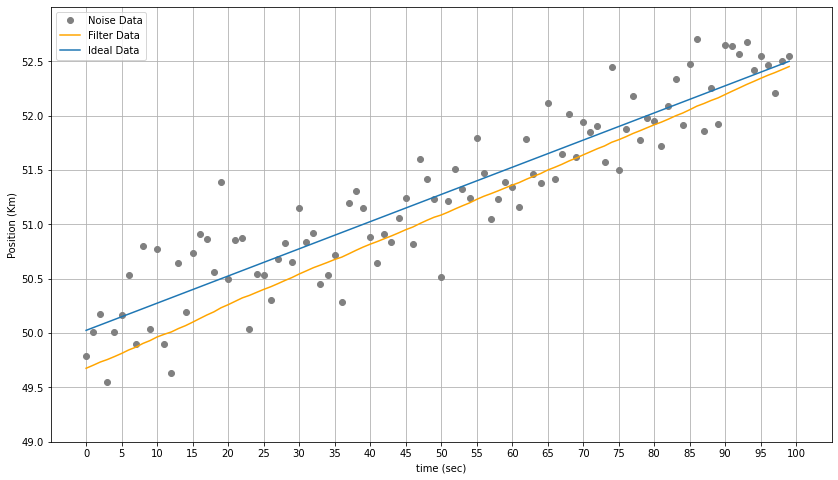

In [37]:
data = g_h_filter(data=z_noise, x0=pos-350, dx=vel, dt=1., g=.01, h=0.0001)
plt.figure(figsize=(14,8))
plt.plot(z_noise/1000,'o',color='gray')
plt.plot(data/1000,color='orange')
plt.plot(z_ideal/1000)
plt.xlabel("time (sec)")
plt.ylabel("Position (Km)")
plt.axis([-5,105,np.floor(val_min),np.ceil(val_max)])
plt.yticks(np.arange(np.floor(val_min),np.ceil(val_max),0.5))
plt.xticks(np.arange(0,105,5))
plt.grid()
plt.legend(["Noise Data","Filter Data","Ideal Data"])
plt.savefig("Graph2.png",dpi=300)
plt.show()